## Imoport Libraries

In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

## Read Dataset

In [2]:
df = pd.read_csv("C:\\Users\\hp\\OneDrive\\Desktop\\Code_Soft\\Data_Science\\advertising.csv")
df

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,14.0
197,177.0,9.3,6.4,14.8
198,283.6,42.0,66.2,25.5


In [3]:
# Display the head of the dataset
print(df.head())

      TV  Radio  Newspaper  Sales
0  230.1   37.8       69.2   22.1
1   44.5   39.3       45.1   10.4
2   17.2   45.9       69.3   12.0
3  151.5   41.3       58.5   16.5
4  180.8   10.8       58.4   17.9


## Exploratory Data Analysis

In [4]:
# Check for missing values and data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [5]:
# Check for missing values and data types
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB
None


In [6]:
# Check for missing values
missing_values = df.isnull().sum()
print("Missing Values:")
print(missing_values)


Missing Values:
TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64


# Data Visualization

Text(0, 0.5, 'Frequency')

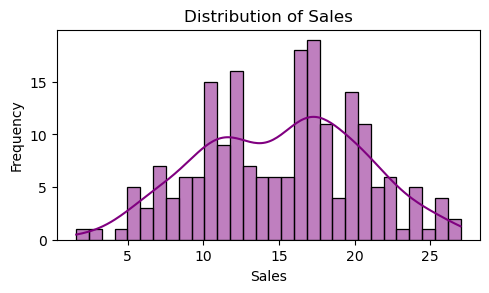

In [7]:
# Distribution of the target variable (Sales)

plt.figure(figsize=(12, 6))
plt.subplot(2, 2, 1)
sns.histplot(df['Sales'], bins=30, kde=True, color='purple')
plt.title('Distribution of Sales')
plt.xlabel('Sales')
plt.ylabel('Frequency')

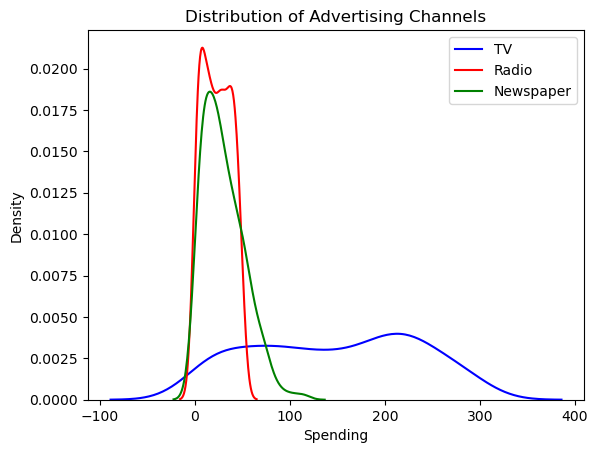

In [8]:
# Distribution of each advertising channel

plt.subplot(1, 1, 1)
sns.kdeplot(df['TV'], label='TV', color='blue')
sns.kdeplot(df['Radio'], label='Radio', color='red')
sns.kdeplot(df['Newspaper'], label='Newspaper', color='green')
plt.title('Distribution of Advertising Channels')
plt.xlabel('Spending')
plt.ylabel('Density')
plt.legend()
plt.show()

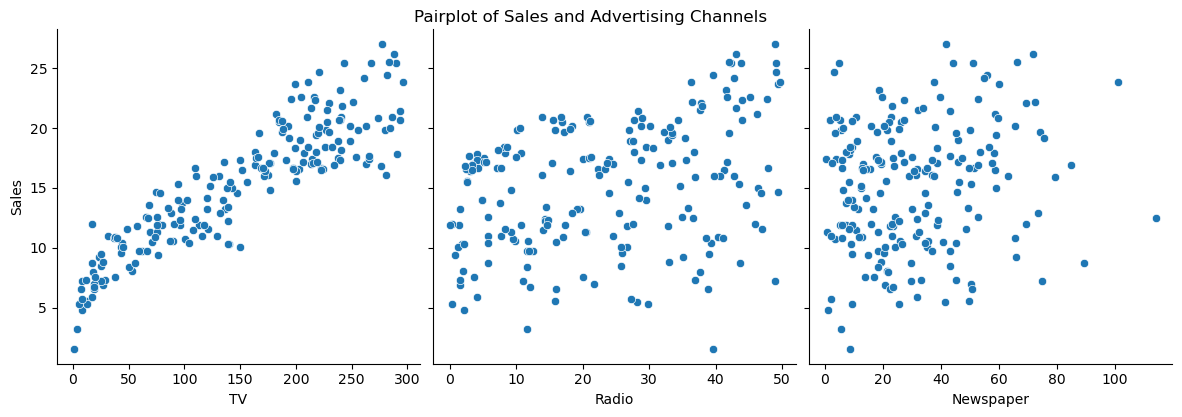

In [9]:
# Visualize the relationship between features and target variable

sns.pairplot(df, x_vars=['TV', 'Radio', 'Newspaper'], y_vars='Sales', height=4, aspect=1, kind='scatter')
plt.suptitle('Pairplot of Sales and Advertising Channels', y=1.02)
plt.show()

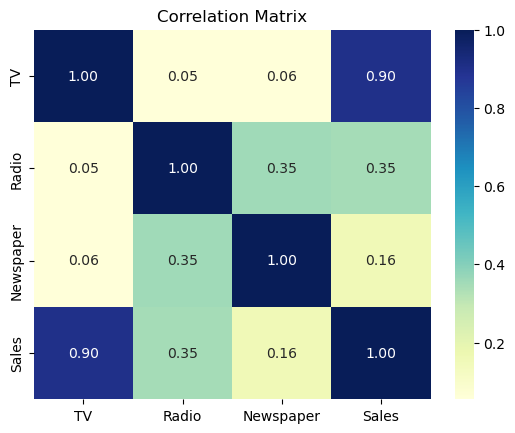

In [10]:
# Correlation matrix

correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap="YlGnBu", fmt=".2f")
plt.title("Correlation Matrix")
plt.show()

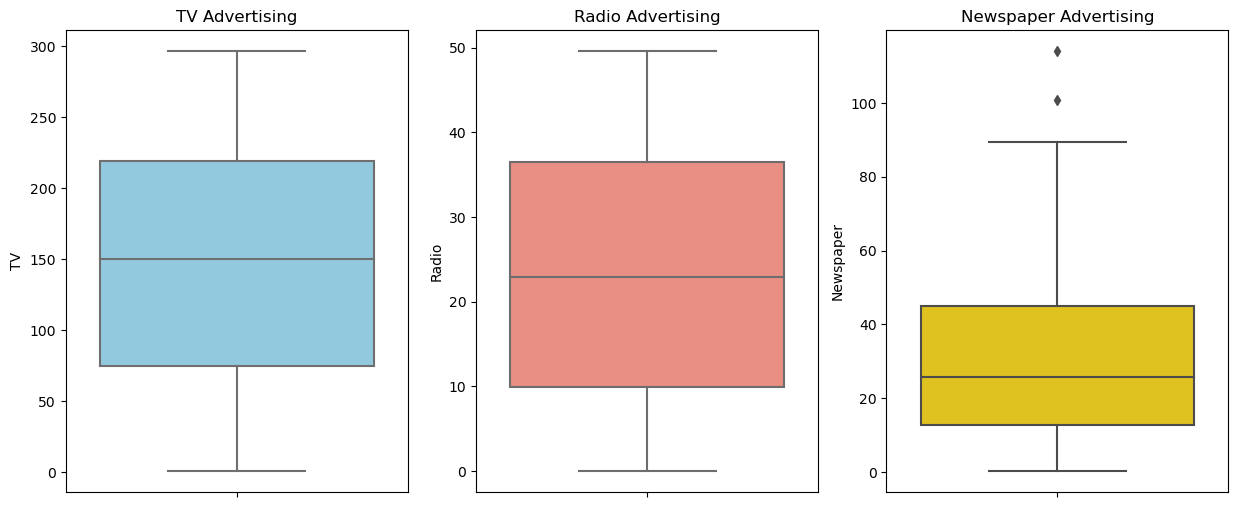

In [11]:
# Boxplot for each advertising channel

plt.figure(figsize=(15, 6))
plt.subplot(1, 3, 1)
sns.boxplot(y='TV', data=df, color='skyblue')
plt.title('TV Advertising')

plt.subplot(1, 3, 2)
sns.boxplot(y='Radio', data=df, color='salmon')
plt.title('Radio Advertising')

plt.subplot(1, 3, 3)
sns.boxplot(y='Newspaper', data=df, color='gold')
plt.title('Newspaper Advertising')

plt.show()

## Models Implementation

In [12]:
# Split the data into features (X) and target variable (y)
X = df[['TV', 'Radio', 'Newspaper']]
y = df['Sales']

In [13]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

**Model Training**

**1. Linear Regression**

In [14]:
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)

LinearRegression()

**2. Random Forest Regressor**

In [15]:
rf_model = RandomForestRegressor()
rf_model.fit(X_train, y_train)

RandomForestRegressor()

**3. XGBoost Regressor**

In [16]:
xgboost_model = XGBRegressor(objective='reg:squarederror', random_state=42)
xgboost_model.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=42, ...)

## Model evaluation 

**1. Linear Regression**

In [17]:
y_pred_linear = linear_model.predict(X_test)
print('Linear Regression - Mean Squared Error:', mean_squared_error(y_test, y_pred_linear))
print('Linear Regression - Mean Absolute Error:', mean_absolute_error(y_test, y_pred_linear))
print('Linear Regression - R2 Score:', r2_score(y_test, y_pred_linear))

Linear Regression - Mean Squared Error: 2.907756910271091
Linear Regression - Mean Absolute Error: 1.274826210954934
Linear Regression - R2 Score: 0.9059011844150826


**2. Random Forest Regressor**

In [18]:
y_pred_rf = rf_model.predict(X_test)
print('Random Forest - Mean Squared Error:', mean_squared_error(y_test, y_pred_rf))
print('Random Forest - Mean Absolute Error:', mean_absolute_error(y_test, y_pred_rf))
print('Random Forest - R2 Score:', r2_score(y_test, y_pred_rf))

Random Forest - Mean Squared Error: 1.4425902500000034
Random Forest - Mean Absolute Error: 0.9114500000000012
Random Forest - R2 Score: 0.9533158932853522


**3. XGBoost Regressor**

In [19]:
y_pred_xgboost = xgboost_model.predict(X_test)
print('XGBoost - Mean Squared Error:', mean_squared_error(y_test, y_pred_xgboost))
print('XGBoost - Mean Absolute Error:', mean_absolute_error(y_test, y_pred_xgboost))
print('XGBoost - R2 Score:', r2_score(y_test, y_pred_xgboost))

XGBoost - Mean Squared Error: 1.4514290545159532
XGBoost - Mean Absolute Error: 0.889899742603302
XGBoost - R2 Score: 0.953029858014247


## Model Comparision

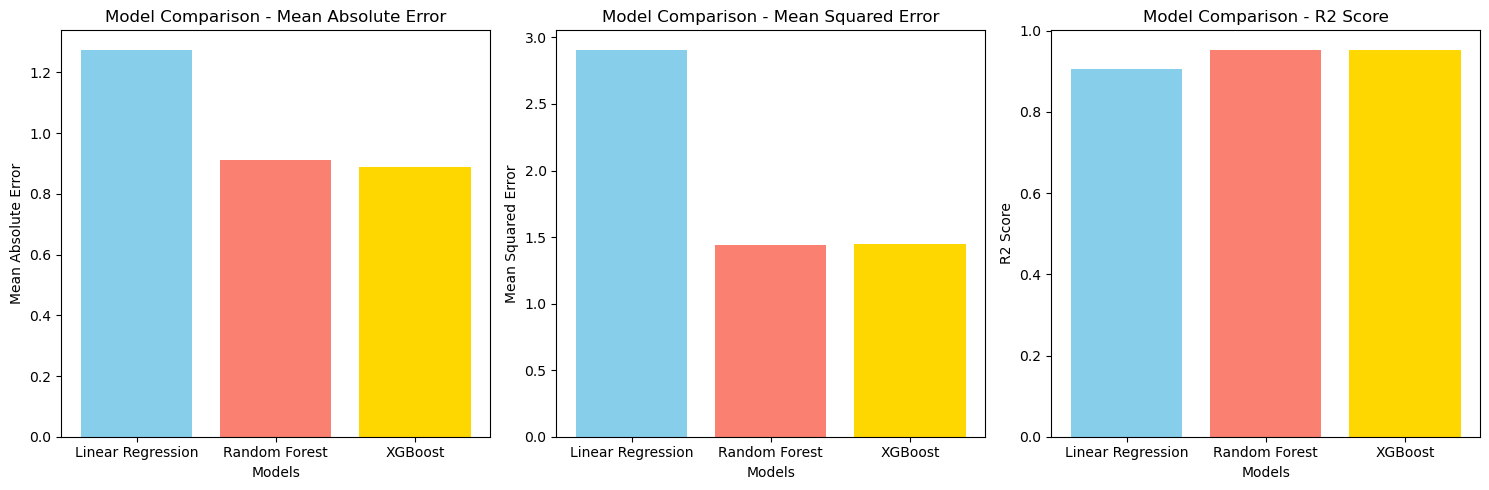

In [20]:
# Calculate Mean Absolute Error for each model
mae_linear = mean_absolute_error(y_test, y_pred_linear)
mae_rf = mean_absolute_error(y_test, y_pred_rf)
mae_xgboost = mean_absolute_error(y_test, y_pred_xgboost)

# Calculate Mean Squared Error for each model
mse_linear = mean_squared_error(y_test, y_pred_linear)
mse_rf = mean_squared_error(y_test, y_pred_rf)
mse_xgboost = mean_squared_error(y_test, y_pred_xgboost)

# Calculate R2 Score for each model
r2_linear = r2_score(y_test, y_pred_linear)
r2_rf = r2_score(y_test, y_pred_rf)
r2_xgboost = r2_score(y_test, y_pred_xgboost)

# Create a bar plot for Model Comparison
models = ['Linear Regression', 'Random Forest', 'XGBoost']
mae_values = [mae_linear, mae_rf, mae_xgboost]
mse_values = [mse_linear, mse_rf, mse_xgboost]
r2_values = [r2_linear, r2_rf, r2_xgboost]

# Plotting Mean Absolute Error
plt.figure(figsize=(15, 5))
plt.subplot(1, 3, 1)
plt.bar(models, mae_values, color=['skyblue', 'salmon', 'gold'])
plt.title('Model Comparison - Mean Absolute Error')
plt.xlabel('Models')
plt.ylabel('Mean Absolute Error')

# Plotting Mean Squared Error
plt.subplot(1, 3, 2)
plt.bar(models, mse_values, color=['skyblue', 'salmon', 'gold'])
plt.title('Model Comparison - Mean Squared Error')
plt.xlabel('Models')
plt.ylabel('Mean Squared Error')

# Plotting R2 Score
plt.subplot(1, 3, 3)
plt.bar(models, r2_values, color=['skyblue', 'salmon', 'gold'])
plt.title('Model Comparison - R2 Score')
plt.xlabel('Models')
plt.ylabel('R2 Score')

plt.tight_layout()
plt.show()


## Visualize the predicted vs. Actual sales for each model

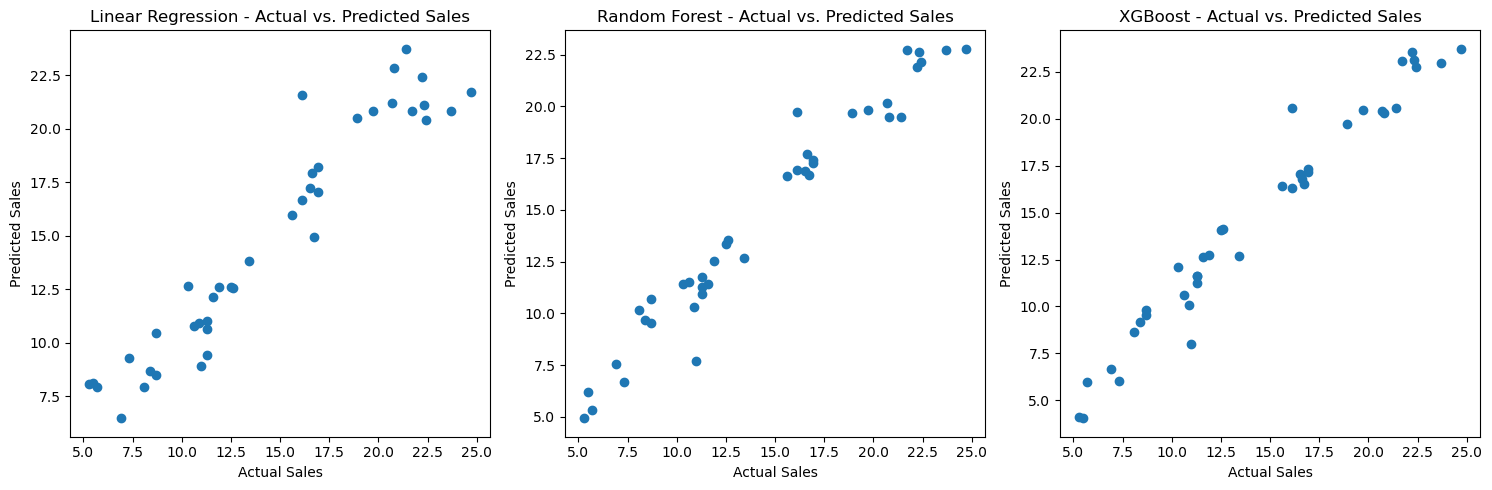

In [21]:
plt.figure(figsize=(15, 5))

# Linear Regression
plt.subplot(1, 3, 1)
plt.scatter(y_test, y_pred_linear)
plt.xlabel("Actual Sales")
plt.ylabel("Predicted Sales")
plt.title("Linear Regression - Actual vs. Predicted Sales")

# Random Forest Regressor
plt.subplot(1, 3, 2)
plt.scatter(y_test, y_pred_rf)
plt.xlabel("Actual Sales")
plt.ylabel("Predicted Sales")
plt.title("Random Forest - Actual vs. Predicted Sales")

# XGBoost Regressor
plt.subplot(1, 3, 3)
plt.scatter(y_test, y_pred_xgboost)
plt.xlabel("Actual Sales")
plt.ylabel("Predicted Sales")
plt.title("XGBoost - Actual vs. Predicted Sales")

plt.tight_layout()
plt.show()

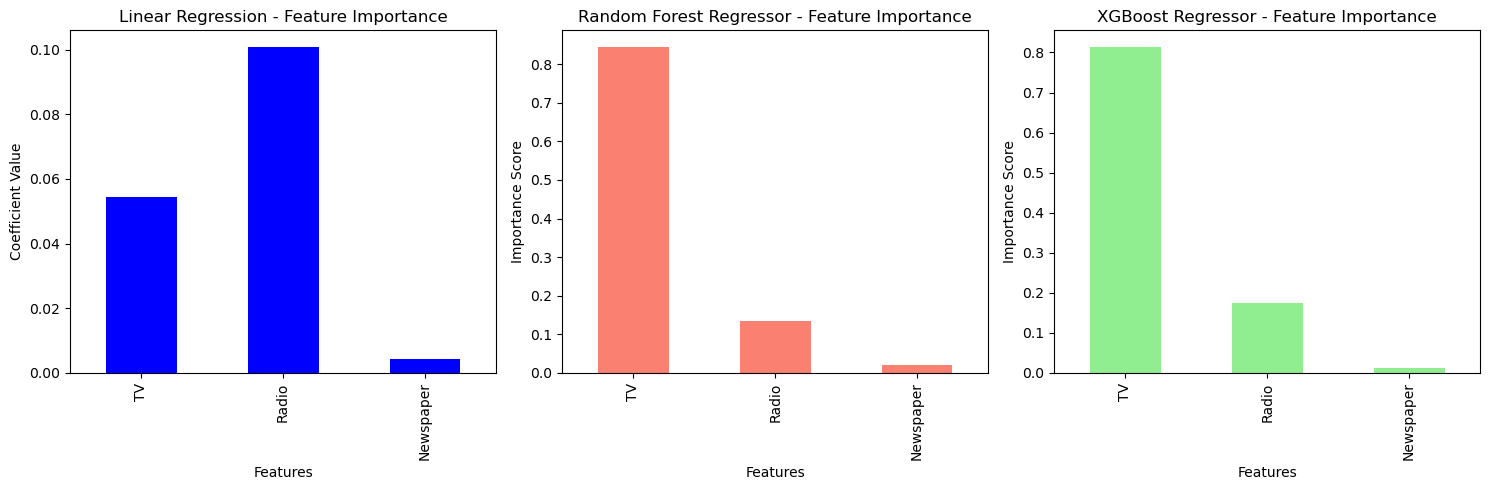

In [22]:
# Feature Importance for Linear Regression (Coefficients)
linear_coef = pd.Series(linear_model.coef_, index=X.columns)

# Feature Importance for Random Forest Regressor
feature_importance_rf = pd.Series(rf_model.feature_importances_, index=X.columns)

# Feature Importance for XGBoost Regressor
feature_importance_xgboost = pd.Series(xgboost_model.feature_importances_, index=X.columns)

# Plotting side by side
plt.figure(figsize=(15, 5))

# Linear Regression
plt.subplot(1, 3, 1)
linear_coef.plot(kind='bar', color='blue')
plt.title('Linear Regression - Feature Importance')
plt.xlabel('Features')
plt.ylabel('Coefficient Value')

# Random Forest Regressor
plt.subplot(1, 3, 2)
feature_importance_rf.sort_values(ascending=False).plot(kind='bar', color='salmon')
plt.title('Random Forest Regressor - Feature Importance')
plt.xlabel('Features')
plt.ylabel('Importance Score')

# XGBoost Regressor
plt.subplot(1, 3, 3)
feature_importance_xgboost.sort_values(ascending=False).plot(kind='bar', color='lightgreen')
plt.title('XGBoost Regressor - Feature Importance')
plt.xlabel('Features')
plt.ylabel('Importance Score')

plt.tight_layout()
plt.show()
